<a href="https://colab.research.google.com/github/rawat999/tensorflow-coursera/blob/master/coursera_3310_MultiLayer_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAVNCE9/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAVNCE9/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteAVNCE9/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=7e-06),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         49920     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                31104     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 605,921
Trainable params: 605,921
Non-trainable params: 0
_________________________________________________________________


In [8]:
NUM_EPOCHS = 20
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/20
391/391 [==============================] - 108s 245ms/step - loss: 0.6931 - accuracy: 0.5089 - val_loss: 0.6931 - val_accuracy: 0.5090
Epoch 2/20
391/391 [==============================] - 95s 243ms/step - loss: 0.6929 - accuracy: 0.5149 - val_loss: 0.6930 - val_accuracy: 0.5122
Epoch 3/20
391/391 [==============================] - 96s 245ms/step - loss: 0.6928 - accuracy: 0.5301 - val_loss: 0.6929 - val_accuracy: 0.5200
Epoch 4/20
391/391 [==============================] - 96s 245ms/step - loss: 0.6926 - accuracy: 0.5411 - val_loss: 0.6928 - val_accuracy: 0.5260
Epoch 5/20
391/391 [==============================] - 96s 244ms/step - loss: 0.6924 - accuracy: 0.5476 - val_loss: 0.6926 - val_accuracy: 0.5330
Epoch 6/20
391/391 [==============================] - 96s 245ms/step - loss: 0.6920 - accuracy: 0.5532 - val_loss: 0.6923 - val_accuracy: 0.5410
Epoch 7/20
391/391 [==============================] - 95s 243ms/step - loss: 0.6913 - accuracy: 0.5695 - val_loss: 0.6918 - val_a

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

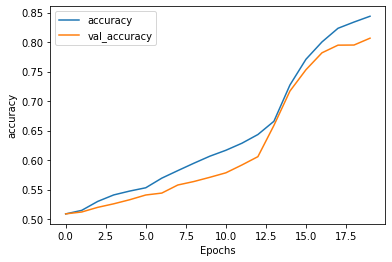

In [10]:
plot_graphs(history, 'accuracy')

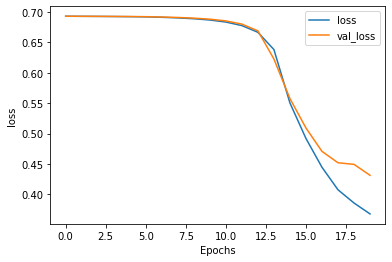

In [11]:
plot_graphs(history, 'loss')